 Import Packages

Package versions

*   pandas==1.4.4
*   matplotlib==3.7.1
*   sklearn==1.2.2



In [1]:
# Pandas contains functions data manipulation and analysis
import pandas as pd

# Matplotlib is a data visualization library containing functions for static, animated, and interactive 2D and 3D plots
import matplotlib.pyplot as plt

# Scikit-learn (sklearn) contains functions of machine learning models, evaluation metrics, helper functions and datasets
import sklearn

import numpy as np

Load and Prepare the Dataset

In [2]:
#Import the data 
data = pd.read_csv('insurance.csv')
#Print top 5 rows of the dataframe
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Print the shape of the data
data.shape

(1338, 7)

There are 6 columns and 395 rows in the imported data.

In [4]:
#Check information about the data including information about the rows and columns, number of non-null values per column, datatype of each column  and total memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that there are all integer values in all the 6 columns of the dataset, including the labels.

The total memory useage of the data is 73.3 KB.

### Missing Values

One might encounter the following terms when talking about missing values- **NAN, NA, or NULL values**. All these terms simply mean the same in our context.


Below, we are checking the dataset for missing values, data type of each column, etc. This is helpful to clean the data before analysis.

In [5]:
#Check if there is any null value per column
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

There are no null value in any column. Had there been any, the second column above would be *True* for that particular column.

The total number of null values per column can be printed using the below function.

In [6]:
#Check the total number of null values per column
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Handling missing values

Had there been any missing values, one may handle them with one of the following techniques. Note that this is not an exhaustive list.

A. **Deletion**: You can simply delete the rows or columns with missing values. However, this approach can result in loss of information in the data.

B. **Imputation**: You can replace the missing values with some estimated values. There are several methods of imputation, including:


1.   **Mean/Median/Mode imputation**: Replace the missing values with the mean, median or mode of the non-missing values in the same column.
  *   *Example 1*: In a dataset of house price prediction, there are missing values for the number of bedrooms in some of the properties. You can replace the missing values with the median number of bedrooms in the non-missing properties.
  * *Example 2*: In a dataset of customer satisfaction ratings, there are missing values for the age of some of the customers. You can replace the missing values with the mode age (most common age) in the non-missing customers.

2.   **Regression imputation**: Predict the missing values using a regression model based on the non-missing values.
  * *Example 1*: In a dataset of predictions of employee salaries, there are missing values for the years of experience of some of the employees. You can use a regression model based on the non-missing values of salary and years of experience to predict the missing values.
  * *Example 2*: In a dataset of prediction of whether medical insurance claims will be raised or not, there are missing values for the amount claimed for some of the patients. You can use a regression model based on the non-missing values of age, gender, and diagnosis to predict the missing values.



3.   **K-Nearest Neighbor imputation**: Find the k-nearest neighbors of the missing value based on the non-missing values and use their average to replace the missing value.

  * *Example 1*: In a dataset of student grades prediction, there are missing values for the final exam score of some of the students. You can find the 5 nearest neighbors of each missing value based on the non-missing values of midterm exam scores, attendance, and participation, and use their average to replace the missing value.
  * *Example 2*: In a dataset of prediction if the credit card transaction is fraudulent, there are missing values for the amount spent for some of the transactions. You can find the 10 nearest neighbors of each missing value based on the non-missing values of merchant type, time of day, and day of the week, and use their average to replace the missing value.

4.   **Multiple Imputation**: Create multiple imputed datasets by filling in the missing values with different plausible values and then analyze each dataset. This approach is more computationally intensive but can provide more accurate results.
  * *Example 1*: In a dataset of car sales prediction, there are missing values for the price of some of the cars. You can create 10 imputed datasets by filling in the missing values with different plausible values based on the non-missing values of features -  make, model, year, mileage, and condition, and then analyze each dataset to obtain more accurate estimates.
  * Example 2: In a dataset of customer churn (i.e., the percentage of customers that stopped using your company's product or service during a certain time frame), there are missing values for the tenure of some of the customers. You can create 5 imputed datasets by filling in the missing values with different plausible values based on the non-missing values of age, gender, income, and contract type, and then analyze each dataset to obtain more accurate predictions of customer churn.

C.   **Treat missing values as a separate category**: If the missing values are not randomly missing, i.e,  you can create a new category to represent the missing values. This approach works well for categorical variables.

* *Example 1*: In a dataset of customer feedback, there are missing values for the reason why some customers were dissatisfied with a product. You can treat the missing values as a separate category to indicate that the reason for dissatisfaction is unknown.
* *Example 2*: In a dataset of employee performance ratings, there are missing values for the supervisor's rating of some employees. You can treat the missing values as a separate category to indicate that the supervisor did not provide a rating for that employee.


The choice of method *depends on the nature and amount of missing data, the type of data, and the purpose of the analysis*. It is important to carefully consider the implications of each method and the impact on the analysis before deciding how to handle missing values.

For example, in a diabetes prediction dataset, one cannot simply take a mean of Haemoglobin (Hb) of the other patients, as this could have health-critical implications.

In [7]:
data= pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
#drop_first:removing multicollinearity

In [8]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### Separating Features and response variable

Below, let us separate the features (independent variables) and the target variable (dependent variable) in the data.

In [9]:
features = data.drop('charges',axis=1)
predictions = data['charges'] #Last column contains the target variable

In [10]:
#Print a fews rows of independent variables
features.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [11]:
#Print a fews rows of dependent variables
predictions.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

The data is split into features and predictions. Now, it will be further divided into the training and testing data.

# Linear Regression

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, predictions, test_size=0.2, random_state=42, shuffle=True)
#20% of the total data is kept as test data

It is clearly eveident that there are no missing values in the data.

Peform Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a crucial step in understanding and analyzing any dataset.

Henceforth, all the analysis will be performed on the train dataset only. Since the test data is not supposed to be used during training, it is kept separate and is not used for any purpose, while we are building the model. In other words, for model building, we assume that test data is not available to us.

In [13]:
Train_data = pd.concat([X_train, y_train], axis = 'columns')
Train_data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
560,46,19.95,2,False,False,True,False,False,9193.83850
1285,47,24.32,0,False,False,False,False,False,8534.67180
1142,52,24.86,0,False,False,False,True,False,27117.99378
969,39,34.32,5,False,False,False,True,False,8596.82780
486,54,21.47,3,False,False,True,False,False,12475.35130


### Summary Statistics

The summary statistics tell us about the distribution (mean, standard deviation, etc.) of all the numerical features in the data. These are particularly helpful in the following ways.

*  **Understanding the distribution of data**: Summary statistics help understand the central tendency and variability of the data. For example, if the mean and median are close, it indicates that the distribution is relatively symmetrical. On the other hand, if the mean is much higher or lower than the median, it indicates that the distribution is skewed.
*  **Identifying missing values**: Summary statistics can help identify if there are any missing values in the dataset. By looking at the count of non-null values for each feature, one can determine if there are any missing values that need to be handled before building a model.
*  **Detecting Outliers**: Outliers can significantly impact the performance of a machine learning model. Summary statistics such as minimum and maximum values, as well as the range and quartile ranges, can help to identify potential outliers.
*  **Feature selection**: Summary statistics can help in selecting the most relevant features for an ML model. By analyzing the variance of each feature, one can identify which features have low variability and may not be useful in predicting the target variable.
*  **Data preprocessing**: Summary statistics can help in determining if data normalization or scaling is required. If the range of values for different features varies significantly, then normalization or scaling may be required to bring the data to a similar range, which can improve the performance of the ML model.


### Summary Statistics

In [14]:
#Print summary statistics
Train_data.describe()

,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,13346.089736
std,14.073960,6.043386,1.215983,12019.510778
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.205000,0.000000,4897.667387
50%,39.500000,30.210000,1.000000,9575.442100
75%,51.000000,34.496250,2.000000,16746.657400
max,64.000000,53.130000,5.000000,62592.873090


The following observations are made.
* There are no outliers in the data.

### Correlation Analysis

The correlation coefficients are calculated between the features and the target variable to identify which features are strongly correlated with the target variable.

In [15]:
#Perform correlation analysis between numerical features
corr_mat = Train_data.corr(method ='pearson') #Pearson correlation is used
corr_mat

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges
age,1.000000,0.118274,0.060999,-0.008459,-0.052035,0.013019,-0.015068,0.022307,0.281721
bmi,0.118274,1.000000,-0.005040,0.015293,-0.003450,-0.112666,0.247317,0.010248,0.197316
children,0.060999,-0.005040,1.000000,0.017080,0.013994,0.033319,-0.025133,-0.002450,0.071885
sex_male,-0.008459,0.015293,0.017080,1.000000,0.070908,0.017047,-0.008217,-0.013911,0.056802
smoker_yes,-0.052035,-0.003450,0.013994,0.070908,1.000000,-0.030547,0.051450,-0.033688,0.780063
region_northwest,0.013019,-0.112666,0.033319,0.017047,-0.030547,1.000000,-0.336290,-0.320954,-0.033776
region_southeast,-0.015068,0.247317,-0.025133,-0.008217,0.051450,-0.336290,1.000000,-0.343194,0.067491
region_southwest,0.022307,0.010248,-0.002450,-0.013911,-0.033688,-0.320954,-0.343194,1.000000,-0.034994
charges,0.281721,0.197316,0.071885,0.056802,0.780063,-0.033776,0.067491,-0.034994,1.000000


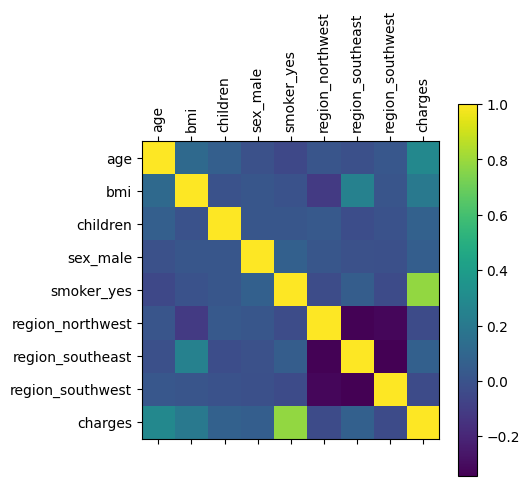

In [16]:
# Visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

### Visualizations
Plot the scatter plot between the dependent varibale and the individual independent variables.

[]

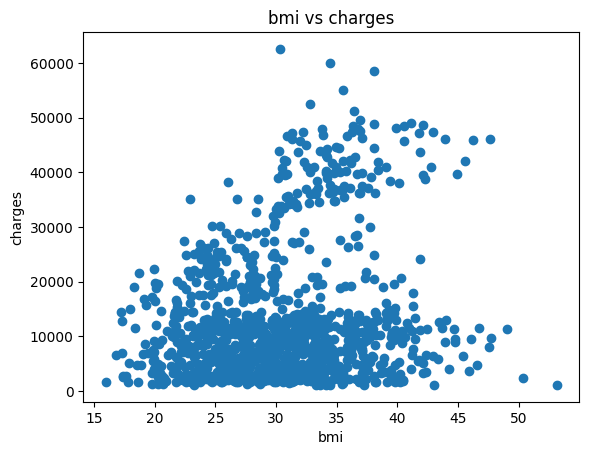

In [17]:
plt.scatter(X_train['bmi'], y_train)
plt.title("bmi vs charges")
plt.xlabel("bmi")
plt.ylabel("charges")
plt.plot()

There seems to be a linear relationship between bmi Year Score and chagres Score.

Model Building: Training and Testing

In [22]:
#Import Linear Regression class
from sklearn.linear_model import LinearRegression


#for linear regression
model = LinearRegression() #Define an object of Linear Regression class
model.fit(X_train, y_train) #Training the model on train data
y_pred_train = model.predict(X_train) #Make predictions on the training set
y_pred = model.predict(X_test) #Make predictions on the testing set





#  Results and Interpretation of Linear Regression

In [80]:
# Evaluate the model using commonly used metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data
print("Evaluation metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data
Mean absolute error:  4208.234572492228
Mean squared error:  37277681.70201866
R-squared score:  0.7417255854683333


Below, let us check the evaluation metrics of the test data-the data that out model has not seen before.

In [82]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print the evaluation metrics on test data
print("Evaluation metrics: Test Data")
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Evaluation metrics: Test Data
Mean absolute error:  4181.194473753654
Mean squared error:  33596915.85136146
R-squared score:  0.7835929767120723


In [84]:
print("Model coefficients: ", model.coef_)
print("Corresponding features: ", features.columns.values)


Model coefficients:  [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Corresponding features:  ['age' 'bmi' 'children' 'sex_male' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']


# Random Forest

In [24]:
# Import Random forest
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model1.fit(X_train, y_train)

# Make predictions on the train set
y_pred_train = model1.predict(X_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)


#  Results and Interpretation of Random Forest 


In [25]:
# Evaluate the model using commonly used metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data
print("Evaluation metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data
Mean absolute error:  1066.4547598904685
Mean squared error:  3753332.4922533343
R-squared score:  0.9739954388867772


In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print the evaluation metrics on test data
print("Evaluation metrics: Test Data")
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Evaluation metrics: Test Data
Mean absolute error:  2550.0784706115096
Mean squared error:  20942520.922619622
R-squared score:  0.8651034329144947


In [27]:
print("Model coefficients: ", model.coef_)
print("Corresponding features: ", features.columns.values)


Model coefficients:  [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]
Corresponding features:  ['age' 'bmi' 'children' 'sex_male' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']


#    Conclusion



I have built a linear regression and Random forest model that predicts the charges Score of the paitent with an R2 score of 0.78 and 0.86 on test data respectively.